In [16]:
import pandas as pd
import matplotlib.pyplot as plot
from sklearn.datasets import load_iris
iris = load_iris()
iris
coln = ['Petal Length','Petal Width','Sepal Length','Sepal Width']
df = pd.DataFrame(iris['data'],columns=coln)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Petal Length  150 non-null    float64
 1   Petal Width   150 non-null    float64
 2   Sepal Length  150 non-null    float64
 3   Sepal Width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


,Petal Length,Petal Width,Sepal Length,Sepal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
iris
df['target'] = iris['target'] 

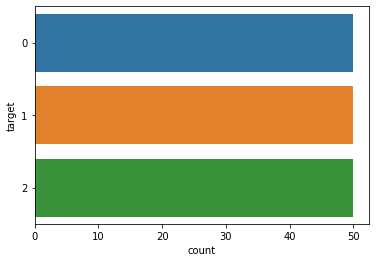

In [18]:
import seaborn as sns
df
sns.countplot(y=df.iloc[:,4],data=df)

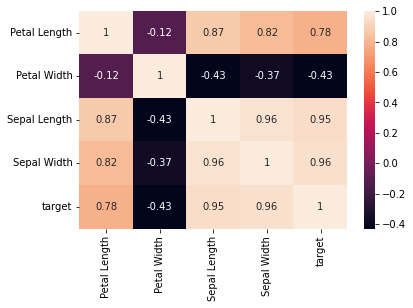

In [19]:
sns.heatmap(df.iloc[:,:5].corr(),annot=True)

In [20]:
from sklearn.preprocessing import StandardScaler
x = df.iloc[:,0:3]
y = df['target']
scaler = StandardScaler()

In [22]:
x_scaled = scaler.fit_transform(x)
x_scaled = np.insert(x_scaled,0,values=1,axis=1)

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.3,random_state=42)

In [24]:
n=1000
alpha = 0.01
m,k=x_train.shape
beta=np.zeros(k)
for i in range(n):
  cost_gradient=np.zeros(k)
  z=x_train.dot(beta)
  predicted=1/(1+np.exp(-z))
  difference = predicted-y_train
  for j in range(k):
    cost_gradient[j]=np.sum(difference.dot(x_train[:,j]))
  for j in range(k):
    beta[j]=beta[j]-(alpha/m)*cost_gradient[j]
print(beta)      

[ 3.88283251  3.29143416 -1.19656536  4.12509112]


In [26]:
y_predict=1/(1+np.exp(-(x_test.dot(beta))))
y_label=np.zeros(len(y_predict))
for i in range(len(y_predict)):
    if(y_predict[i]>=0.5):
        y_label[i]=1
y_label

array([1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0.])

In [27]:
TP=0
TN=0
FP=0
FN=0
y_test=np.array(y_test).reshape(-1,1)
for i in range(len(y_label)):
  if (y_test[i]==1 and y_label[i]==1):
    TP=TP+1
  if (y_test[i]==1 and y_label[i]==0):
    FN=FN+1
  if (y_test[i]==0 and y_label[i]==1):
    FP=FP+1
  if (y_test[i]==0 and y_label[i]==0):
    TN=TN+1
  
print(TP,TN,FP,FN)


13 19 0 0


In [28]:
accuracy=(TP+TN)/(TP+TN+FN)
#FOR POSITIVE CLASS
precision_pos=TP/(TP+FP)
recall_pos=TP/(TP+FN)
f1_score_pos=2*precision_pos*recall_pos/(precision_pos+recall_pos)
print(precision_pos,recall_pos,f1_score_pos)
#FOR NEGATIVE CLASS
precision_neg=TN/(TN+FN)
recall_neg=TN/(TN+FP)
f1_score_neg=2*precision_neg*recall_neg/(precision_neg+recall_neg)
print(precision_neg,recall_neg,f1_score_neg)

1.0 1.0 1.0
1.0 1.0 1.0


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr=LogisticRegression(solver='sag')
model=lr.fit(x_train,y_train)
y_label1=model.predict(x_test)
print(metrics.classification_report(y_test,y_label1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

